1. Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (a,SIGMA^2). По каждой из M выборок с надежностью GAMMA найти
интервальную оценку (доверительный интервал) для дисперсии случайной величины X.
По результатам моделирования найти точечную оценку GAMMA* надежности GAMMA.
Чем Вы можете объяснить наблюдающееся отклонение точечной оценки GAMMA* от
надежности GAMMA?

In [1]:
import numpy as np
import scipy.stats as st

M = 1800  # Количество выборок
n = 20    # Размер каждой выборки
a = 5     # Математическое ожидание
SIGMA = np.sqrt(4)  # Истинное стандартное отклонение
GAMMA = 0.94  # Заданная надежность

# Моделирование выборок
X_n = np.random.normal(a, SIGMA, size=(M, n))

# Истинная дисперсия
true_variance = SIGMA**2

# Считаем доверительные интервалы и проверяем попадание
contained_count = 0
for X in X_n:
    # Выборочная дисперсия
    sample_variance = np.var(X, ddof=1)
    
    # Границы доверительного интервала
    chi2_lower = st.chi2.ppf((1 - GAMMA) / 2, df=n - 1)
    chi2_upper = st.chi2.ppf((1 + GAMMA) / 2, df=n - 1)
    interval_left = (n - 1) * sample_variance / chi2_upper
    interval_right = (n - 1) * sample_variance / chi2_lower

    # Проверяем, попадает ли истинное значение в интервал
    if interval_left <= true_variance <= interval_right:
        contained_count += 1

# Точечная оценка надежности
gamma_star = contained_count / M

# Результаты
print(f"Точечная оценка gamma*: {gamma_star:.5f}")
print(f"Наблюдаемое отклонение: {abs(gamma_star - GAMMA):.5f}")


Точечная оценка gamma*: 0.94222
Наблюдаемое отклонение: 0.00222


2. Повторив пункт 1. K раз, получите массив из K значений оценки GAMMA*. Найдите выборочные числовые характеристики оценки GAMMA*, постройте гистограмму относительных частот и бокс- плот.

Каким может быть закон распределения оценки GAMMA* ?
 
Чему равны математическое ожидание и дисперсия оценки GAMMA* ?

Мат. ожидание оценки GAMMA*: 0.93974
Дисперсия оценки GAMMA*: 2.67128e-05
Минимум: 0.92500
Максимум: 0.95167
Медиана: 0.93944


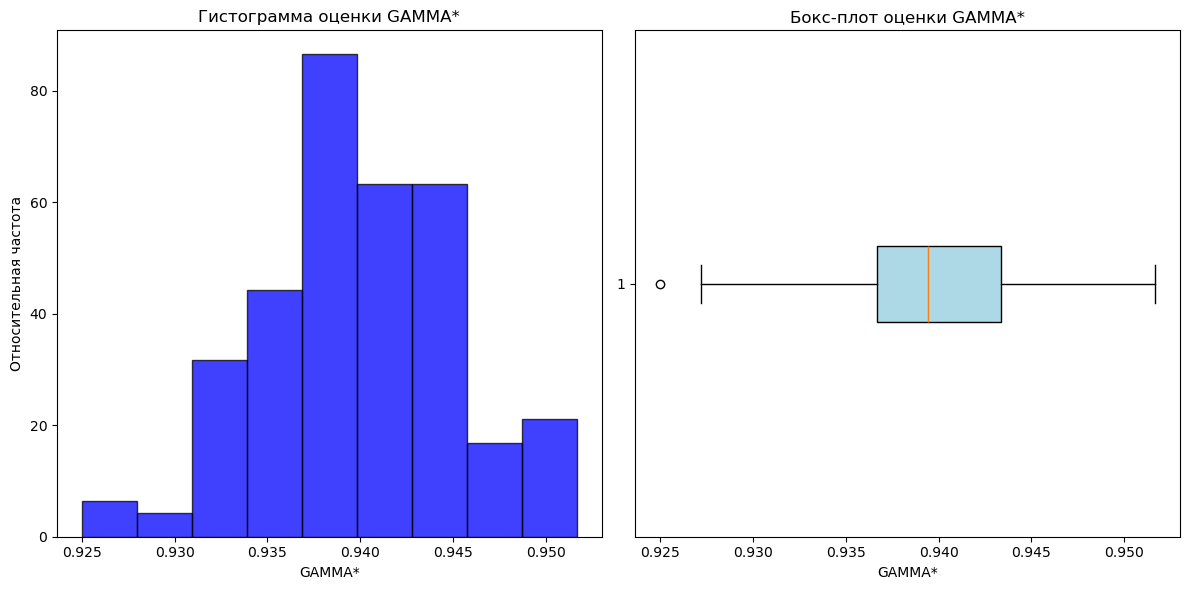

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Параметры
K = 160  # Число повторений эксперимента
M = 1800  # Количество выборок в каждом эксперименте
n = 20  # Размер выборки
a = 5  # Мат. ожидание
SIGMA = np.sqrt(4)  # Стандартное отклонение
GAMMA = 0.94  # Надежность

gamma_star_values = []

# Повторяем K экспериментов
for _ in range(K):
    # Генерация выборок
    X_n = np.random.normal(a, SIGMA, size=(M, n))
    
    # Истинная дисперсия
    true_variance = SIGMA**2
    
    # Считаем доверительные интервалы и проверяем попадания
    contained_count = 0
    for X in X_n:
        sample_variance = np.var(X, ddof=1)
        
        # Доверительный интервал
        chi2_lower = st.chi2.ppf((1 - GAMMA) / 2, df=n - 1)
        chi2_upper = st.chi2.ppf((1 + GAMMA) / 2, df=n - 1)
        interval_left = (n - 1) * sample_variance / chi2_upper
        interval_right = (n - 1) * sample_variance / chi2_lower

        if interval_left <= true_variance <= interval_right:
            contained_count += 1

    # Сохраняем точечную оценку GAMMA*
    gamma_star = contained_count / M
    gamma_star_values.append(gamma_star)

# Вычисление выборочных характеристик
#gamma_star_values = np.array(gamma_star_values)
mean_gamma_star = np.mean(gamma_star_values)  # Мат. ожидание
var_gamma_star = np.var(gamma_star_values)  # Дисперсия

# Результаты
print(f"Мат. ожидание оценки GAMMA*: {mean_gamma_star:.5f}")
print(f"Дисперсия оценки GAMMA*: {var_gamma_star:.5e}")
print(f"Минимум: {np.min(gamma_star_values):.5f}")
print(f"Максимум: {np.max(gamma_star_values):.5f}")
print(f"Медиана: {np.median(gamma_star_values):.5f}")

# Построение графиков
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(gamma_star_values, bins="scott", density=True, alpha=0.75, color='blue', edgecolor='black')
plt.title("Гистограмма оценки GAMMA*")
plt.xlabel("GAMMA*")
plt.ylabel("Относительная частота")

# Бокс-плот
plt.subplot(1, 2, 2)
plt.boxplot(gamma_star_values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Бокс-плот оценки GAMMA*")
plt.xlabel("GAMMA*")

plt.tight_layout()
plt.show()


3. Смоделировать M выборок из n значений случайной величины W. По каждой из M выборок с надежностью GAMMA найти интервальную оценку (доверительный интервал) для дисперсии случайной величины W (для построения
интервальной оценки дисперсии использовать ту же формулу, что и в пункте 1, Части II).
По результатам моделирования найти точечную оценку GAMMA* надежности GAMMA. 

Чем Вы можете объяснить наблюдающееся отклонение точечной оценки GAMMA* от надежности GAMMA?

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Параметры
M = 1800  # Количество выборок
n = 20    # Размер выборки (число W)
gamma = 0.94  # Надежность

# Параметры равномерного распределения
a_U, b_U = 1, 2  # Интервал [1, 2]
sample_size_U = 5  # Размер выборки U для вычисления W

# Истинное математическое ожидание и дисперсия W
true_mean_U = (a_U + b_U) / 2
true_variance_U = ((b_U - a_U)**2) / 12
true_variance_W = true_variance_U / sample_size_U

# Моделирование M выборок W
W_samples = []
for _ in range(M):
    U = np.random.uniform(a_U, b_U, size=(n, sample_size_U))  # Матрица U
    W = U.mean(axis=1)  # Вычисляем W = (1/5) * sum(U_i)
    W_samples.append(W)

W_samples = np.array(W_samples)

# Доверительные интервалы для дисперсии W
chi2_lower = st.chi2.ppf((1 - gamma) / 2, df=n - 1)
chi2_upper = st.chi2.ppf((1 + gamma) / 2, df=n - 1)

contained_count = 0
for W in W_samples:
    sample_variance = np.var(W, ddof=1)
    interval_left = (n - 1) * sample_variance / chi2_upper
    interval_right = (n - 1) * sample_variance / chi2_lower

    # Проверяем, попадает ли истинная дисперсия W в интервал
    if interval_left <= true_variance_W <= interval_right:
        contained_count += 1

# Точечная оценка GAMMA*
gamma_star = contained_count / M
print(f"Точечная оценка GAMMA*: {gamma_star:.5f}")

# Анализ отклонений
print(f"Отклонение от GAMMA: {abs(gamma - gamma_star):.5f}")


Точечная оценка GAMMA*: 0.95278
Отклонение от GAMMA: 0.01278


4. Повторив пункт 3. K раз, получите массив из K значений оценки GAMMA*. Найдите выборочные числовые характеристики оценки GAMMA*, постройте гистограмму относительных частот и бокс-
плот.

Каким может быть закон распределения оценки GAMMA* ?

Среднее значение gamma*: 0.95289
Дисперсия gamma*: 0.00002
Стандартное отклонение gamma*: 0.00469
Медиана gamma*: 0.95278


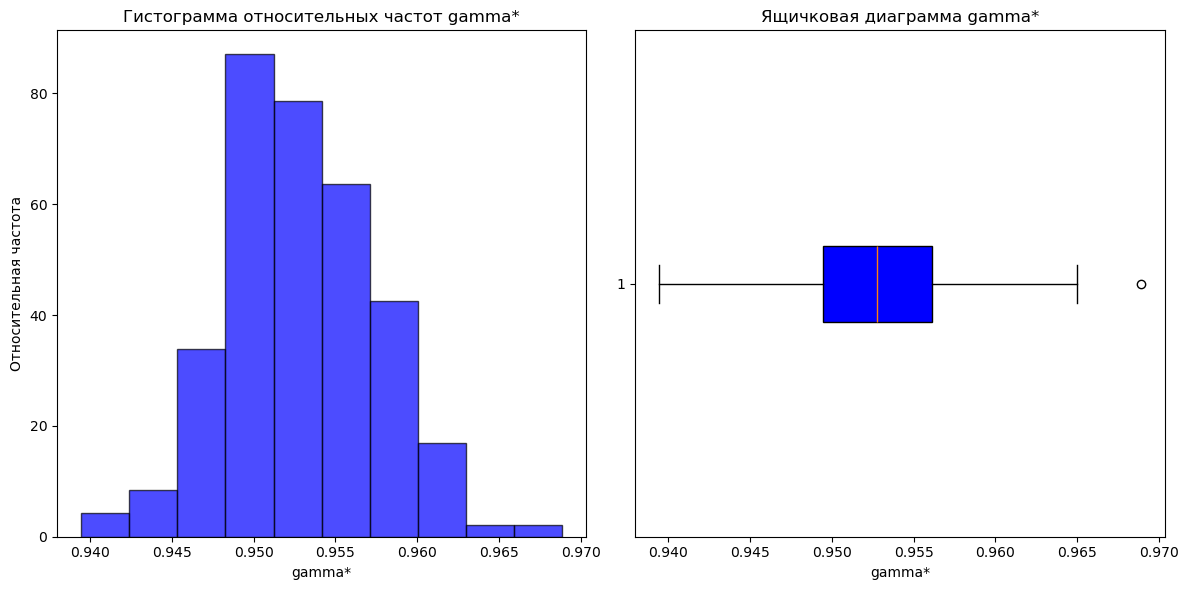

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Параметры
K = 160  # Количество повторений (оценок gamma*)
M = 1800  # Количество выборок в каждом моделировании
n = 20  # Размер каждой выборки
gamma = 0.94  # Надежность
sample_size_U = 5  # Размер выборки U для W
a_U, b_U = 1, 2  # Интервал равномерного распределения [1, 2]

# Истинное значение дисперсии W
true_variance_U = ((b_U - a_U)**2) / 12
true_variance_W = true_variance_U / sample_size_U

# Функция для одного моделирования и получения gamma*
def simulate_gamma_star(M, n, gamma, true_variance_W):
    chi2_lower = st.chi2.ppf((1 - gamma) / 2, df=n - 1)
    chi2_upper = st.chi2.ppf((1 + gamma) / 2, df=n - 1)

    contained_count = 0
    for _ in range(M):
        U = np.random.uniform(a_U, b_U, size=(n, sample_size_U))
        W = U.mean(axis=1)
        sample_variance = np.var(W, ddof=1)
        interval_left = (n - 1) * sample_variance / chi2_upper
        interval_right = (n - 1) * sample_variance / chi2_lower

        if interval_left <= true_variance_W <= interval_right:
            contained_count += 1

    return contained_count / M

# Моделирование K значений gamma*
gamma_star_values = [simulate_gamma_star(M, n, gamma, true_variance_W) for _ in range(K)]

# Выборочные числовые характеристики
mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values, ddof=1)
std_gamma_star = np.std(gamma_star_values, ddof=1)
median_gamma_star = np.median(gamma_star_values)

print(f"Среднее значение gamma*: {mean_gamma_star:.5f}")
print(f"Дисперсия gamma*: {var_gamma_star:.5f}")
print(f"Стандартное отклонение gamma*: {std_gamma_star:.5f}")
print(f"Медиана gamma*: {median_gamma_star:.5f}")

# Визуализация
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(gamma_star_values, bins="scott", density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Гистограмма относительных частот gamma*')
plt.xlabel('gamma*')
plt.ylabel('Относительная частота')

# Бокс-плот
plt.subplot(1, 2, 2)
plt.boxplot(gamma_star_values, vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
plt.title('Ящичковая диаграмма gamma*')
plt.xlabel('gamma*')

plt.tight_layout()
plt.show()
